<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

* Decision Trees are Machine Learning algorithms that can perform both classification and regression tasks. 

* The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

* Decision Trees requires very little data preparation, they don't require feature scaling or centering.

* Decision trees provide nice, simple classification rules that can even be applied manually if need be (e.g., for flower classification). The field of interpretable ML aims at creating ML systems that can explain their decisions in a way humans can understand. This is important in many domains — for example, to ensure the system does not make unfair decisions.

* Scikit-Learn uses the CART algorithm, which produces only binary trees, meaning trees where split nodes always have exactly two children (i.e., questions only have yes/no answers). However, other algorithms, such as ID3, can produce decision trees with nodes that have more than two children.

* The CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be optimal.

* Limitations:
  * high variance: small changes to the hyperparameters or to the data may produce very different models. By averaging predictions over many trees, it’s possible to reduce variance significantly. Such an ensemble of trees is called a random forest, and it’s one of the most powerful types of models available today.

  * orthogonal decision boundaries (all splits are perpendicular to an axis), which makes decision trees sensitive to the data’s orientation. One way to limit this problem is to scale the data, then apply a principal component analysis transformation.




# Classification Example using ScikitLearn

## Train a Decision Tree



In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.tree import export_graphviz
from graphviz import Source

In [79]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
#print(iris.DESCR)

In [80]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

## Visualization and Interpretation of a Decision Tree

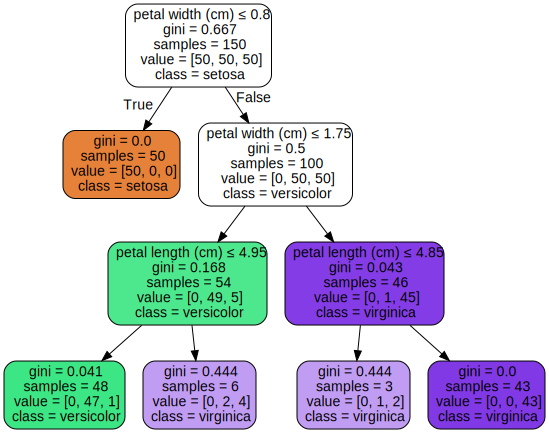

In [81]:
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,  
                           special_characters=True)  
Source(dot_data)  

In [82]:
# place the iris data in a pandas dataframe
iris_df = pd.DataFrame(data=iris.data, 
                  columns=iris.feature_names)

classes = {0: "setosa",
           1: "versicolor",
           2: "virginica"}

iris_df['target'] = pd.Series([classes[i] for i in iris.target])  

## Classify an iris flower using the Decision Tree

   * Start at the root node. If the petal length is smaller or equal than 2.45 cm, then you go to the root's left child ("Yes" go left, "No" go right). Since you are now at a leaf node, you simply look at the predicted class of that node. In this case, the decision tree predicts that your flower is an Iris setosa (class=setosa).

In [83]:
iris_df.iloc[0]

sepal length (cm)       5.1
sepal width (cm)        3.5
petal length (cm)       1.4
petal width (cm)        0.2
target               setosa
Name: 0, dtype: object


   * Let's look at the 50th sample in the dataset (see sample's feature values below). Since the petal length is 4.7 and $4.7 > 2.45$ cm, we now go to the right child. Now you are at a split node, so you answer another question: is the petal width $\leq 1.75$? The answer is "Yes" ($1.4\leq 1.75$), so we go the left child. Since the petal length equals $4.7 \leq 4.95$, we then go left again and arrive at a leaf node, pedicting that our flower is an Iris versicolor.



In [ ]:
iris_df.iloc[50]

sepal length (cm)           7.0
sepal width (cm)            3.2
petal length (cm)           4.7
petal width (cm)            1.4
target               versicolor
Name: 50, dtype: object

## Sample and value attributes

* The `sample` attribute counts how many training instances it applies to.

* A node’s `value` attribute tells you how many training instances of each class this node applies to. In this case, we have three classes: Iris setosa, Iris versicolor, and Iris virginica and we start at the root with 50 samples per each class.



## Gini impurity and entropy 

* A node’s `gini` attribute measures its **Gini impurity**: a node is “pure” (`gini=0`) if all training instances it applies to belong to the same class. 

   * The Gini impurity $G_i$ of the $i$-th node is computed using:

 $$G_i = \sum_{k=1}^n p_{i,k}(1 - p_{i,k}) = 1 - \sum_{k=1}^n p_{i,k}^2$$

   where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i$-th node.

   * For example, the depth 2 right node has a Gini impurity equal to 
$$1 – (0/46)^2 – (1/46)^2 – (45/46)^2 ≈ 0.043.$$


* By default, the [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) class uses the Gini impurity measure, but you can select the entropy impurity measure instead by setting the `criterion` hyperparameter to `"entropy"`. Gini impurity is slightly faster to compute, so it is a good default. 

* In machine learning, entropy is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class. 

* Entropy of the $i$-th node:
$$H_i = -\sum_{\substack{k=1 \\ p_{i,k}\neq 0}}^n p_{i,k} \log_2(p_{i,k})$$
  * For example, the depth 2 left node  has an entropy equal to $$–(49/54) \log_2 (49/54) – (5/54) \log_2 (5/54) ≈ 0.445.$$

# The Classification and Regression Tree (CART) Algorithm

* Scikit-Learn uses the CART algorithm to train Decision Trees (also called "growing trees"):

   * CART constructs binary trees by splitting the training set at each node into two subsets using a feature $k$ and threshold $t_k$ that yield the largest information gain (reduction of entropy).
   * The splitting procedure at each child is repeated until it cannot find a split that will reduce impurity (i.e. the training examples at each node all belong to the same class). In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we set a limit for the maximum depth of the tree (defined by the `max_depth` hyperparameter).
   * There are some other hyperparameters we can use to control additional stopping conditions:
    * `min_samples_split`: minimum number of samples required to split an internal node,
    * `min_samples_leaf`: minimum number of samples required to be at a leaf node,
    * `min_weight_fraction_leaf`: minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node,
    * `max_leaf_nodes`: grow a tree with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

    See https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html for more details.
   * CART cost function for classification:
   $$J(k, t_k) = \frac{m_{left}}{m}G_{left} +  \frac{m_{right}}{m}G_{right}$$
   where $G_{left/right}$ measures the impurity of the left/right subset, and 
   $m_{left/right}$ is the number of instances in the left/right subset.





# Regression Example using ScikitLearn

* The tree will look very similar to the classification tree we saw in the previous example. The main difference is that instead of predicting a class in each node, **it predicts a value**.

* We build a regression tree using Scikit-Learn’s [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) class, training it on a noisy quadratic dataset with `max_depth=2`:

In [84]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

In [85]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

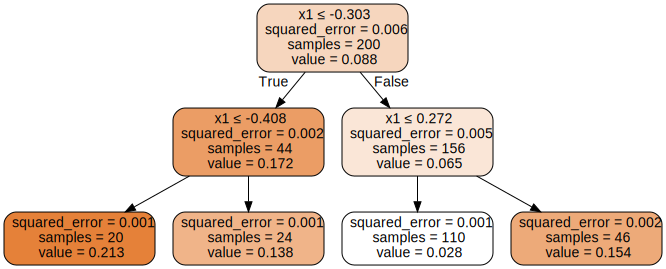

In [86]:
dot_data = export_graphviz(tree_reg, out_file=None, 
                                feature_names=["x1"],
                                filled=True, rounded=True,  
                                special_characters=True)  
Source(dot_data)  

* The CART algorithm works as described earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE. 

* CART cost function for regression:

$$J(k, t_k) = \frac{m_{left}}{m}\text{MSE}_{left} +  \frac{m_{right}}{m}\text{MSE}_{right}$$


where $$\text{MSE}_{node}=\frac{\sum_{i\ \in\ node}\left(\widehat{y}_{node}-y^{(i)}\right)^2}{m_{node}}$$
and 
$$\widehat{y}_{node}=\frac{\sum_{i\ \in\ node}y^{(i)}}{m_{node}}$$




# References:

* https://scikit-learn.org/stable/modules/tree.html

* [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, by Aurélien Géron.](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)